# Case Study: Vehicle Advertisements Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#1.import vehicles dataset
df=pd.read_csv(r"C:\Users\Bhakti\Downloads\extractme\vehicles.csv")

In [3]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)

In [4]:
#Print first 5 rows
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [5]:
#To show number of columns and rows
df.shape

(258888, 26)

In [6]:
#To get information about columns and their DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [7]:
#To display the summary statistics of dataset
df.describe()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
count,258888,258881,155505,258888,258888,258888,255077,258882,258882,258882,258888,258888,258888,258888,258888,258888,258888,258888,249838,249838,249838,258888,258888,108634,258888,258888
unique,203314,193000,18053,258879,118237,2,5495,113463,252696,255120,13,1,204,21,25,1,1,1,2,2,2,2,3,90,135732,80719
top,Bicycle in Gampaha City | ikman,Good condition,"50,000 km",bajaj-re-2003-for-sale-kandy-62,Bicycle,for_sale,"Rs 25,000",08 Dec 1:04 pm,2023-03-08T10:25:58+05:30,2023-01-27T04:34:43.000Z,Motorbikes,Vehicles,Gampaha City,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,December 2016,{'Service type': 'Transport Services'},95a2c7432ab661901fd052b7830d959187641c1079efe3...
freq,89,1860,3115,2,3275,257731,2688,65,7,3,67642,258888,10299,99158,99158,258888,258888,258888,151134,249794,249824,190841,159394,9404,8560,2135


In [8]:
#To for missing values
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [9]:
#To check Duplicate values
df.duplicated().sum()

0

In [10]:
# Function to extract year from title column
import re
def extract_year(title):
    # Regular expression to match year (4 digits) at the end of the string
    match = re.search(r'(\d{4})$', title)
    if match:
        year = match.group(1)
        return pd.Series([year])
    else:
        return pd.Series([None])

#Function Call
df[['Year']] = df['title'].apply(extract_year)
df.drop(columns=['title'], inplace=True)

In [11]:
#Function to extract dictionaries to add as column from properties column
#Store those new columns in df1
import ast
def safe_eval(x):
    try:
        return ast.literal_eval(x)  # Safely evaluate the string to a dictionary
    except (SyntaxError, ValueError):
        return {}  # Return an empty dictionary if evaluation fails

# Apply safe_eval to convert strings to dictionaries, leave dictionaries unchanged
df['properties'] = df['properties'].apply(lambda x: safe_eval(str(x)))

# Define desired keys to extract
desired_keys = ['Mileage', 'Brand', 'Model', 'Condition']

# Initialize empty lists to store values
mileage_values = []
brand_values = []
model_values = []
condition_values = []

# Iterate over rows to populate lists
for index, row in df.iterrows():
    properties_dict = row['properties']
    mileage_values.append(properties_dict.get('Mileage', None))
    brand_values.append(properties_dict.get('Brand', None))
    model_values.append(properties_dict.get('Model', None))
    condition_values.append(properties_dict.get('Condition', None))

# Create new DataFrame with extracted values
df1= pd.DataFrame({
    'Mileage': mileage_values,
    'Brand': brand_values,
    'Model': model_values,
    'Condition': condition_values
})
df.drop(columns=['properties'], inplace=True)

In [12]:
#Extract City name from area column 
df['area'] = df['area'].apply(ast.literal_eval)
df['area_name'] = df['area'].apply(lambda x: x.get('name'))
df.drop(columns=['area'], inplace=True)

In [13]:
#Concat df and df1 to get new added columns
newdf = pd.concat([df, df1], axis=1)

In [14]:
#Data types of new dataframe
newdf.dtypes

ad_title                object
ad_description          object
details                 object
slug                    object
type                    object
price                   object
timestamp               object
posted_date             object
deactivation_date       object
category                object
parent_category         object
location                object
geo_region              object
is_delivery_free          bool
is_doorstep_delivery      bool
is_dsd_applicable         bool
is_member               object
is_authorized_dealer    object
is_featured_member      object
is_verified               bool
membership_level        object
member_since            object
user                    object
Year                    object
area_name               object
Mileage                 object
Brand                   object
Model                   object
Condition               object
dtype: object

In [15]:
#First 5 rows to study the new columns data
newdf.head()

,ad_title,ad_description,details,slug,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,user,Year,area_name,Mileage,Brand,Model,Condition
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,False,False,False,True,False,False,True,premium,September 2019,a6681dea494390daa516a6d2bdcb36e08c318574a13413...,None,Colombo,None,None,None,Reconditioned
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,False,False,False,True,False,False,True,plus,June 2018,5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...,None,Colombo,None,Other brand,None,Reconditioned
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,False,False,False,True,False,False,True,plus,June 2018,5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...,None,Colombo,None,None,None,Reconditioned
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,False,False,False,True,False,False,False,plus,February 2017,634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...,None,Colombo,None,None,None,New
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,False,False,False,True,False,False,False,plus,February 2017,634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...,None,Colombo,None,None,None,New


In [16]:
#Checking Null Values
newdf.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
user                         0
Year                     98932
area_name                    0
Mileage                 103383
Brand                    67847
Model                    99093
Condition                20146
dtype: int64

In [17]:
#Drop Null Values because that values are very less as comapre to data rows
newdf.dropna(subset=['price'],inplace=True)
newdf.dropna(subset=['timestamp'],inplace=True)
newdf.dropna(subset=['posted_date'],inplace=True)
newdf.dropna(subset=['deactivation_date'],inplace=True)
newdf.dropna(subset=['ad_description'],inplace=True)

In [18]:
#Filling the categorical values with most frequent value
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
newdf[['is_member']]=imputer.fit_transform(newdf[['is_member']])
newdf[['is_authorized_dealer']]=imputer.fit_transform(newdf[['is_authorized_dealer']])
newdf[['is_featured_member']]=imputer.fit_transform(newdf[['is_featured_member']])

In [19]:
#Find number of rows having price negotiable
len(np.where(newdf['price']=='Negotiable')[0])

1673

In [20]:
#Drop rows that have price is negitiable
newdf = newdf.drop(newdf.index[np.where(newdf['price']=='Negotiable')[0]])

In [21]:
len(np.where(newdf['price']=='Negotiable')[0])

0

In [22]:
#Replace Rs and comma from price column values to convert it from object to numeric
newdf['price'] = newdf['price'].str.replace('Rs', '').str.replace(',', '').str.strip().astype(float)

In [23]:
#Convert Price column in numeric
newdf['price'] = pd.to_numeric(newdf['price'])

In [24]:
newdf.shape

(253391, 29)

In [25]:
newdf.dtypes

ad_title                 object
ad_description           object
details                  object
slug                     object
type                     object
price                   float64
timestamp                object
posted_date              object
deactivation_date        object
category                 object
parent_category          object
location                 object
geo_region               object
is_delivery_free           bool
is_doorstep_delivery       bool
is_dsd_applicable          bool
is_member                object
is_authorized_dealer     object
is_featured_member       object
is_verified                bool
membership_level         object
member_since             object
user                     object
Year                     object
area_name                object
Mileage                  object
Brand                    object
Model                    object
Condition                object
dtype: object

In [26]:
#Checking unique values of each column
newdf.nunique()

ad_title                198704
ad_description          190819
details                  18052
slug                    253382
type                         1
price                     5493
timestamp               112625
posted_date             247472
deactivation_date       249785
category                    13
parent_category              1
location                   204
geo_region                  21
is_delivery_free             1
is_doorstep_delivery         1
is_dsd_applicable            1
is_member                    2
is_authorized_dealer         2
is_featured_member           2
is_verified                  2
membership_level             3
member_since                90
user                     80129
Year                       153
area_name                   25
Mileage                  20090
Brand                      142
Model                      937
Condition                    3
dtype: int64

In [27]:
#Drop columns having unique only 1 value because that columns are not effective
newdf=newdf.drop(columns=['member_since','details','type','parent_category','is_delivery_free','is_doorstep_delivery','is_dsd_applicable'],axis=1)

In [28]:
newdf.nunique()

ad_title                198704
ad_description          190819
slug                    253382
price                     5493
timestamp               112625
posted_date             247472
deactivation_date       249785
category                    13
location                   204
geo_region                  21
is_member                    2
is_authorized_dealer         2
is_featured_member           2
is_verified                  2
membership_level             3
user                     80129
Year                       153
area_name                   25
Mileage                  20090
Brand                      142
Model                      937
Condition                    3
dtype: int64

In [29]:
newdf.isnull().sum()

ad_title                    0
ad_description              0
slug                        0
price                       0
timestamp                   0
posted_date                 0
deactivation_date           0
category                    0
location                    0
geo_region                  0
is_member                   0
is_authorized_dealer        0
is_featured_member          0
is_verified                 0
membership_level            0
user                        0
Year                    93481
area_name                   0
Mileage                 97914
Brand                   62383
Model                   93625
Condition               14710
dtype: int64

In [30]:
newdf.category.value_counts()

category
Auto Parts & Accessories    67348
Motorbikes                  67285
Cars                        48076
Three Wheelers              17993
Lorries & Trucks            11961
Bicycles                    11290
Vans                         9448
Auto Services                7739
Rentals                      6971
Tractors                     2432
Heavy Duty                   1857
Buses                         714
Boats & Water Transport       277
Name: count, dtype: int64

In [31]:
#Remove categories that not belong to Vehicle
index=newdf[newdf['category'] == 'Auto Parts & Accessories'].index
newdf.drop(index, inplace=True)

In [32]:
index=newdf[newdf['category'] == 'Auto Services'].index
newdf.drop(index, inplace=True)

In [33]:
index=newdf[newdf['category'] == 'Rentals'].index
newdf.drop(index, inplace=True)

In [34]:
newdf.category.value_counts()

category
Motorbikes                 67285
Cars                       48076
Three Wheelers             17993
Lorries & Trucks           11961
Bicycles                   11290
Vans                        9448
Tractors                    2432
Heavy Duty                  1857
Buses                        714
Boats & Water Transport      277
Name: count, dtype: int64

In [35]:
#Drop Null values
newdf=newdf.dropna()

In [36]:
# Remove suffix 'Km' from mileage and convert it into integer type
newdf['Mileage'] = newdf['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)
newdf['Mileage'] = pd.to_numeric(newdf['Mileage'])

In [37]:
#Converting year column from object to integer
newdf['Year']=newdf['Year'].astype(int)

In [38]:
#Now no null values in our dataset
newdf.isnull().sum()

ad_title                0
ad_description          0
slug                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
location                0
geo_region              0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
user                    0
Year                    0
area_name               0
Mileage                 0
Brand                   0
Model                   0
Condition               0
dtype: int64

In [39]:
#Brand Compines availiable in brand columns
brands = newdf.Brand.value_counts()
allbrands = brands[brands>=90].index
allbrands

Index(['Bajaj', 'Honda', 'Toyota', 'Suzuki', 'Yamaha', 'TVS', 'Nissan', 'Hero',
       'Mitsubishi', 'Tata', 'Mahindra', 'Isuzu', 'Demak', 'Mercedes Benz',
       'Mazda', 'BMW', 'Micro', 'Daihatsu', 'Hyundai', 'Kia', 'Land Rover',
       'Piaggio', 'Audi', 'Ashok Leyland', 'Perodua', 'Ranomoto',
       'Other brand', 'Maruti Suzuki', 'KTM', 'Peugeot', 'DFSK', 'Loncin',
       'Foton', 'Ford', 'Renault', 'Dfsk', 'Kinetic', 'Other Brand', 'MG',
       'JAC', 'Kawasaki', 'Zotye', 'Subaru', 'Volkswagen', 'Chery',
       'Ssang Yong', 'Mini', 'Chevrolet', 'Lexus', 'Datsun', 'Jaguar', 'Jeep',
       'Aprilia'],
      dtype='object', name='Brand')

In [40]:
#Models of vehicles availiable in Model columns
models = newdf.Model.value_counts()
allmodels = models[models>=100].index
allmodels

Index(['RE', 'Dio', 'Other Model', 'Pulsar 150', 'CT100', 'Alto', 'Discover',
       'Platina', 'FZ', 'Pleasure',
       ...
       'A6', 'E350', '4DR', 'Z100', 'MX 7', 'Xtream', 'CD 200', 'Gusto',
       'Mini Cooper', 'Tusker'],
      dtype='object', name='Model', length=233)

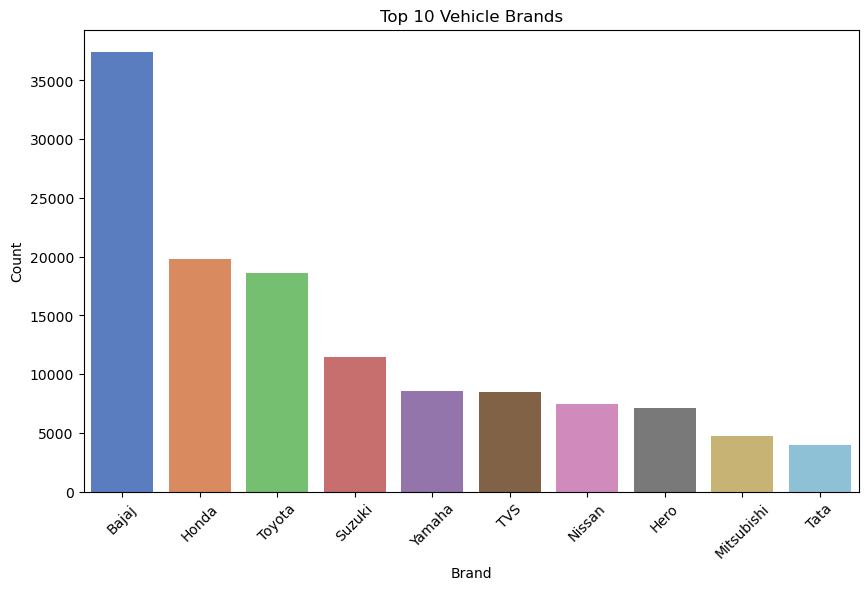

In [41]:
#Plot countplot to show the top 10 vehicle brand.
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=newdf, palette='muted', order=newdf['Brand'].value_counts().index[:10])
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Vehicle Brands')
plt.xticks(rotation=45)
plt.show()

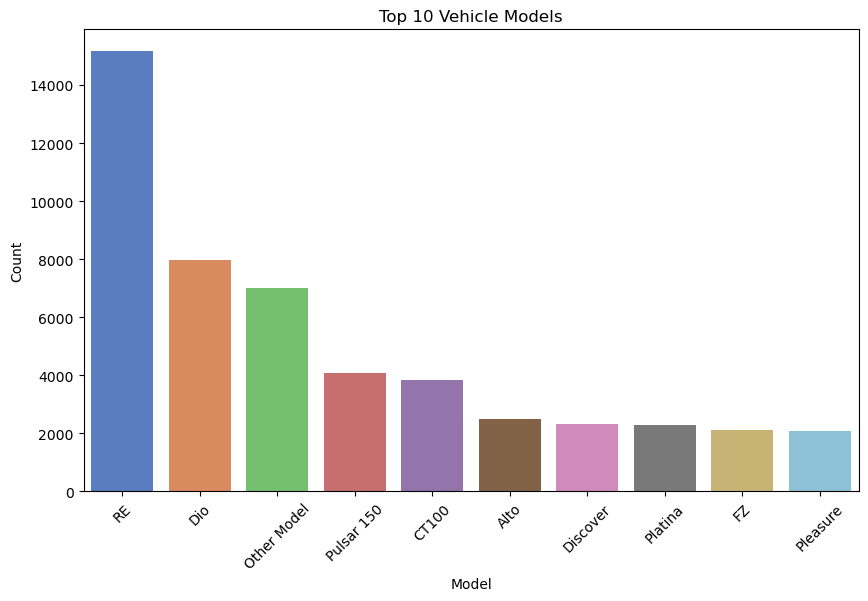

In [42]:
#Plot countplot to show the top 10 vehicle Model.
plt.figure(figsize=(10, 6))
sns.countplot(x='Model', data=newdf, palette='muted', order=newdf['Model'].value_counts().index[:10])
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 10 Vehicle Models')
plt.xticks(rotation=45)
plt.show()

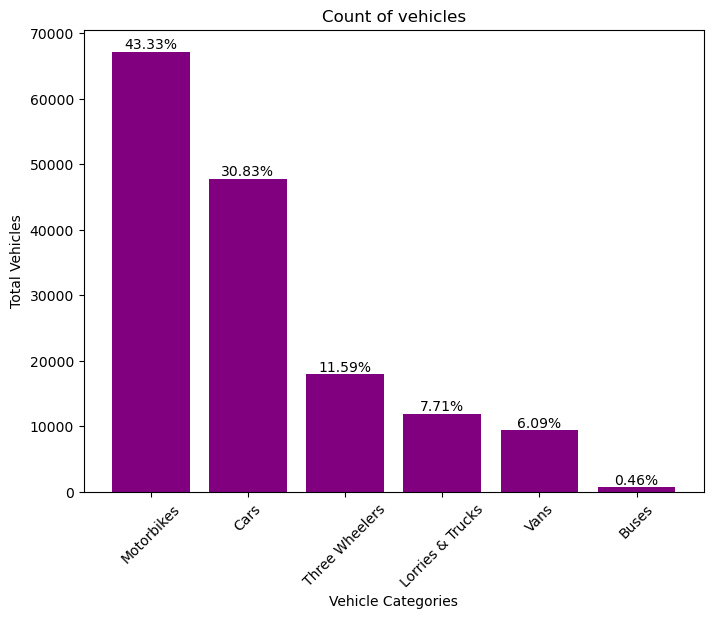

In [43]:
#Category vise percentage of vehicles
category_counts = newdf['category'].value_counts()
labels = category_counts.index
sizes = category_counts.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

plt.figure(figsize=(8, 6))
bar=plt.bar(category_counts.index, category_counts.values, color='purple')
plt.title('Count of vehicles')
plt.xlabel('Vehicle Categories')
plt.ylabel('Total Vehicles')
plt.xticks(rotation=45)
#plt.show()

for bar, percentages in zip(bar.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{percentages:.2f}%", ha='center', va='bottom')

plt.show()

In [44]:
#To know the columns name
newdf.columns

Index(['ad_title', 'ad_description', 'slug', 'price', 'timestamp',
       'posted_date', 'deactivation_date', 'category', 'location',
       'geo_region', 'is_member', 'is_authorized_dealer', 'is_featured_member',
       'is_verified', 'membership_level', 'user', 'Year', 'area_name',
       'Mileage', 'Brand', 'Model', 'Condition'],
      dtype='object')

In [45]:
#Selecting Effective columns on price
cols =  ['price','category','Year', 'Mileage', 'Condition','Model', 'Brand']
#Get that columns to new dataframe from original dataframe
df2= newdf[cols]

In [46]:
df2.head()

,price,category,Year,Mileage,Condition,Model,Brand
31,22000000.0,Cars,2019,0,New,Rexton,Ssang Yong
1349,14500000.0,Cars,2017,9000,Reconditioned,CHR,Toyota
1701,10500000.0,Cars,2015,24000,Reconditioned,Axio,Toyota
1702,6500000.0,Cars,2016,55000,Reconditioned,Atrai Wagon,Daihatsu
1917,11500000.0,Cars,2010,137000,Used,C180,Mercedes Benz


In [47]:
df2.dtypes

price        float64
category      object
Year           int32
Mileage        int32
Condition     object
Model         object
Brand         object
dtype: object

In [48]:
df2.category.value_counts()

category
Motorbikes          67139
Cars                47770
Three Wheelers      17962
Lorries & Trucks    11940
Vans                 9430
Buses                 713
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
# Encoding Categorical columns

In [51]:
df2['category']=df2.category.replace('Motorbikes',0).replace('Cars',3).replace('Three Wheelers',1).replace('Vans',2).replace('Lorries & Trucks',4).replace('Buses',5)

C:\Users\Bhakti\AppData\Local\Temp\ipykernel_20284\1825085873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category']=df2.category.replace('Motorbikes',0).replace('Cars',3).replace('Three Wheelers',1).replace('Vans',2).replace('Lorries & Trucks',4).replace('Buses',5)


In [52]:
df2['Condition']=df2.Condition.replace('Reconditioned',0).replace('Used',1).replace('New',2)

C:\Users\Bhakti\AppData\Local\Temp\ipykernel_20284\1563386026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Condition']=df2.Condition.replace('Reconditioned',0).replace('Used',1).replace('New',2)


In [53]:
dum=pd.get_dummies(df2.Model).astype(int)
dum.head()

,104,1100,116i,118i,150,190D,2,2 Skyactive,2008,206,208,218i,225XE,250,3,300,3008,305,307,308,316i,318i,318is,320d,320i,330e,330i,350,370Z,390,404,405,406,407,408,420d,430i,4DR,4Runner,4S,500,5008,505,508,520d,520i,523i,525i,528i,530d,530e,530i,535i,6,607,690,718 Boxter,718 Cayman,730Ld,730d,730iL,735Li,735i,740Le,740Li,740e,80,800,850,90,940,A-Star,A1,A160,A180,A200,A3,A4,A45,A5,A6,A7,A8,AD Wagon,APE,ASX,ATM,AX1,AX100,Accent,Access,Accord,Ace,Achiever,Activa,ActiveHybrid 3,ActiveHybrid 5,ActiveHybrid 7,Actros,Acty,Actyon,Aero,Airwave,Alfa,Allion,Almera,Alpha,Alphard,Alto,Apache,Ape,Aqua,Aspire,Astina,Astra,Atlas,Atos,Atrai Wagon,Attrage,Attrai,Auman,Aumark,Auris,Avalon,Avanza,Avenger,Avenger Cruise,Avenger Street,Avensis,Aventura,Aveo,Aviator,Axela,Axia,Axio,B180,B200,B250e,BAIC,BRZ,BT-50,Baleno,Balius,Bandit,Beat,Beetle,Belta,Benly,Bezza,Bighorn,Blaze,Blazo,Bluebird,Bolero,Bongo,Boon,Bora,Boss,Boxer,Bravo,Brawny,Brebis,Bullet,Burgman,Butterfly,Byk,C160,C180,C200,C220,C230,C250,C300,C350,CB 125,CB Hornet,CB Shine,CB Trigger,CB Unicorn,CB4,CBR,CBZ,CD,CD 100,CD 110,CD 125,CD 200,CD 70,CD 90,CD Down,CG125,CHR,CLA 180,CLA 200,CLA45,CLK 200,CLS,CM Custom,CRF,CRV,CRZ,CT-200H,CT100,CX-5,Cabstar,Cadenza,Caldina,Caliber,Cambridge,Cami,Camry,Canbus,Canter,Caravan,Carens,Carina,Carol,Carry,Cast Activa,Cayenne,Cedia,Cefiro,Celerio,Celeste,Celica,Centra,Centuro,Cerato,Ceres,Chaly,Charade,Chariot,Charmant,Cherokee,Ciaz,City,Civic,Civilian,Clarity,Classic,Clipper,Coaster,Colt,Comet,Comfort,Compass,Cooper,Copen,Corolla,Corona,Corsa,Corvette,Countryman,Coupe,Creon,Crossland,Crossroad,Crown,Cruze,Cultus,Cuore,Cynos,D Tracker,D-Max,D20 HACH,D7,DR,DRZ,DT,DTM,DXT Dart,DZM,DZR,Dare,Dash,Dawn,Dayz,Defender,Delica,Demio,Diavel,Dimo Batta,Dimo Batti,Dimo Lokka,Dio,Discover,Discover 110,Discover 125,Discovery,Discovery Sport,Djebel,Dominar,Dorsoduro,Downtown 125i,Downtown 350i,Dream,Dualis,Duet,Duke,Duke 200,Duro,Dutro,Dutsun,Dyna,Dzire,E180,E200,E220,E240,E250,E300,E350,E46,E60,EK Custom,Eagle,Eclipse Cross,Ecomet,Ecosport,Elantra,Elf,Eliminator,Emgrand,Enticer,Eon,Ertiga,Escudo,Espero,Esquire,Esse,Esteem,Estilo,Estrella,Etios,Everest,Every,Excel,Exora,Explorer,Extreme,F-Pace,F-Type,F50,FA4TS,FJ Cruiser,FTR,FZ,FZ S,FZ25,Fabia,Facino,Fairlady Z,Familia,Fargo,Fascino,Fazer,Festiva,Fielder,Fiesta,Fit,Fit Aria,Fit She's,Fit Shuttle,Flair,Flame,Focus,Forester,Forland,Fortuner,Fortwo,Forward,Forza,Freed,Freelander,Fuso,GF,GLA 180,GLA 200,GLA 250,GLB,GLC 250,GLE 300D,GLE 400,GLE 500,GN 125,GN 250,GS 125,GT,GT86,Galant,Geely,Gemini,Gen-2,GenX Nano,Getz,Ghibli V6,Gixxer,Gizmo,Gladiator,Glamour,Gloria,Glory,Go,Go Plus,Golf,Grace,Grand Cherokee,Grand Vitara,Grand i10,Grass Tracker,Grazia,Gusto,Gypsy,H100,H2,H3,HF Dawn,HF Deluxe,HR-V,HS250H,Harrier,Hiace,Higer,Hijet,Hilux,Homy,Hornet,Hunk,Hustler,IST,Ignis,Ignitor,Impreza,Indica,Indigo,Insight,Integra,Interceptor,Intruder,Ioniq,J20,J24,JGR,Jade,Jazz,Jeeto,Jetta,Jimny,Jinbei,Jonway,Journey,Juke,Junior,Jupiter,Juston,KDH,KDX,KITO,KLX,KUV100,KWID,KX,Kancil,Karizma,Karoq,Keeway,Kelisa,Kembara,Kenari,King,Kona,Korando,Korondo,Kristal,Kuga,Kyron,L200,LD,LPT,LS400,LX,LX450,Lancer,Land Cruiser Prado,Land Cruiser Sahara,Lanos,Largo,Laser,Leaf,Legacy,Leganza,Lets,Levorg,Liana,Libero,Lifan,Like 125 ABS,Linea,Liteace,Little Cub,Livo,Logo,Luxura,Lynx,M,M2,M235i,M3,MD,MITR,ML350,MOCO,MR-S,MT 06,MT 09,MT 15,MU-7,MU-X,MX 7,MX-5,Macan,Maestro Edge,Magna,Magnus,Majesty,March,Marcopolo,Marino,Mark,Maruti,Mate,Matrix,Maxximo,Mega,Mentor,Metro,Micra,Mini,Mini Cooper,Minicab,Minor,Mira,Mirage,Model S,Mondeo,Monster,Montero,Move,Mpv,Musso,Mustang,N Max,N-Box,N-WGN,NV200,NV400,NX,NX300H,Nano,Navara,Navi,Nexon,Ninja,Noah,Nomad,Note,Ntorq,Nubira,Octavia,Odyssey,Ollin,Omega,Omni,Optima,Other Model,Other model,Outlander,Oxford,PCX,Pajero,Panamera,Panda,Panda Cross,Panther,Passat,Passion,Passion Plus,Passion pro,Passo,Pathfinder,Patrol,Pattaya,Persona,Picanto,Pixis,Platina,Platz,Pleasure,Polo,Premio,Presea,Prima,Primera,Prius,Privilage,Pro,

In [54]:
dum1 = pd.get_dummies(df2.Brand).astype(int)
dum1.head()

,Alfa Romeo,Aprilia,Ashok Leyland,Aston Martin,Atco,Audi,Austin,BMW,Bajaj,Brilliance,Chery,Chevrolet,Chopper,Chrysler,Citroen,DFSK,Daewoo,Daihatsu,Datsun,Demak,Dfsk,Ducati,Eicher,Electra,Falcon,Faw,Fiat,Ford,Foton,Geely,Golden Dragon,Harley Davidson,Hero,Hino,Honda,Hummer,Hyundai,Isuzu,JAC,JMC,Jaguar,Jeep,KTM,KYMCO,Kawasaki,Kia,Kinetic,Kinglong,Land Rover,Lexus,Loncin,MG,Mahindra,Maruti,Maruti Suzuki,Maserati,Mazda,Mercedes Benz,Micro,Mini,Minnelli,Mitsubishi,Morris,Nissan,Opel,Other Brand,Other brand,Perodua,Peugeot,Piaggio,Porsche,Proton,Ranomoto,Renault,Rover,Royal Enfield,Scooty,Skoda,Smart,Sojen,Ssang Yong,Subaru,Suzuki,TVS,Tata,Tesla,Toyota,Triumph,UD,Vauxhall,Vespa,Volkswagen,Volvo,Yamaha,Yujien,Zotye
31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1702,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df2.head()

,price,category,Year,Mileage,Condition,Model,Brand
31,22000000.0,3,2019,0,2,Rexton,Ssang Yong
1349,14500000.0,3,2017,9000,0,CHR,Toyota
1701,10500000.0,3,2015,24000,0,Axio,Toyota
1702,6500000.0,3,2016,55000,0,Atrai Wagon,Daihatsu
1917,11500000.0,3,2010,137000,1,C180,Mercedes Benz


In [56]:
df2=pd.concat([df2,dum,dum1],axis=1)

In [57]:
#Drop original categorical columns that are encoded
df2.drop(['Brand','Model'],axis=1,inplace=True)

In [58]:
#After encoding categorical columns
df2.head()

,price,category,Year,Mileage,Condition,104,1100,116i,118i,150,190D,2,2 Skyactive,2008,206,208,218i,225XE,250,3,300,3008,305,307,308,316i,318i,318is,320d,320i,330e,330i,350,370Z,390,404,405,406,407,408,420d,430i,4DR,4Runner,4S,500,5008,505,508,520d,520i,523i,525i,528i,530d,530e,530i,535i,6,607,690,718 Boxter,718 Cayman,730Ld,730d,730iL,735Li,735i,740Le,740Li,740e,80,800,850,90,940,A-Star,A1,A160,A180,A200,A3,A4,A45,A5,A6,A7,A8,AD Wagon,APE,ASX,ATM,AX1,AX100,Accent,Access,Accord,Ace,Achiever,Activa,ActiveHybrid 3,ActiveHybrid 5,ActiveHybrid 7,Actros,Acty,Actyon,Aero,Airwave,Alfa,Allion,Almera,Alpha,Alphard,Alto,Apache,Ape,Aqua,Aspire,Astina,Astra,Atlas,Atos,Atrai Wagon,Attrage,Attrai,Auman,Aumark,Auris,Avalon,Avanza,Avenger,Avenger Cruise,Avenger Street,Avensis,Aventura,Aveo,Aviator,Axela,Axia,Axio,B180,B200,B250e,BAIC,BRZ,BT-50,Baleno,Balius,Bandit,Beat,Beetle,Belta,Benly,Bezza,Bighorn,Blaze,Blazo,Bluebird,Bolero,Bongo,Boon,Bora,Boss,Boxer,Bravo,Brawny,Brebis,Bullet,Burgman,Butterfly,Byk,C160,C180,C200,C220,C230,C250,C300,C350,CB 125,CB Hornet,CB Shine,CB Trigger,CB Unicorn,CB4,CBR,CBZ,CD,CD 100,CD 110,CD 125,CD 200,CD 70,CD 90,CD Down,CG125,CHR,CLA 180,CLA 200,CLA45,CLK 200,CLS,CM Custom,CRF,CRV,CRZ,CT-200H,CT100,CX-5,Cabstar,Cadenza,Caldina,Caliber,Cambridge,Cami,Camry,Canbus,Canter,Caravan,Carens,Carina,Carol,Carry,Cast Activa,Cayenne,Cedia,Cefiro,Celerio,Celeste,Celica,Centra,Centuro,Cerato,Ceres,Chaly,Charade,Chariot,Charmant,Cherokee,Ciaz,City,Civic,Civilian,Clarity,Classic,Clipper,Coaster,Colt,Comet,Comfort,Compass,Cooper,Copen,Corolla,Corona,Corsa,Corvette,Countryman,Coupe,Creon,Crossland,Crossroad,Crown,Cruze,Cultus,Cuore,Cynos,D Tracker,D-Max,D20 HACH,D7,DR,DRZ,DT,DTM,DXT Dart,DZM,DZR,Dare,Dash,Dawn,Dayz,Defender,Delica,Demio,Diavel,Dimo Batta,Dimo Batti,Dimo Lokka,Dio,Discover,Discover 110,Discover 125,Discovery,Discovery Sport,Djebel,Dominar,Dorsoduro,Downtown 125i,Downtown 350i,Dream,Dualis,Duet,Duke,Duke 200,Duro,Dutro,Dutsun,Dyna,Dzire,E180,E200,E220,E240,E250,E300,E350,E46,E60,EK Custom,Eagle,Eclipse Cross,Ecomet,Ecosport,Elantra,Elf,Eliminator,Emgrand,Enticer,Eon,Ertiga,Escudo,Espero,Esquire,Esse,Esteem,Estilo,Estrella,Etios,Everest,Every,Excel,Exora,Explorer,Extreme,F-Pace,F-Type,F50,FA4TS,FJ Cruiser,FTR,FZ,FZ S,FZ25,Fabia,Facino,Fairlady Z,Familia,Fargo,Fascino,Fazer,Festiva,Fielder,Fiesta,Fit,Fit Aria,Fit She's,Fit Shuttle,Flair,Flame,Focus,Forester,Forland,Fortuner,Fortwo,Forward,Forza,Freed,Freelander,Fuso,GF,GLA 180,GLA 200,GLA 250,GLB,GLC 250,GLE 300D,GLE 400,GLE 500,GN 125,GN 250,GS 125,GT,GT86,Galant,Geely,Gemini,Gen-2,GenX Nano,Getz,Ghibli V6,Gixxer,Gizmo,Gladiator,Glamour,Gloria,Glory,Go,Go Plus,Golf,Grace,Grand Cherokee,Grand Vitara,Grand i10,Grass Tracker,Grazia,Gusto,Gypsy,H100,H2,H3,HF Dawn,HF Deluxe,HR-V,HS250H,Harrier,Hiace,Higer,Hijet,Hilux,Homy,Hornet,Hunk,Hustler,IST,Ignis,Ignitor,Impreza,Indica,Indigo,Insight,Integra,Interceptor,Intruder,Ioniq,J20,J24,JGR,Jade,Jazz,Jeeto,Jetta,Jimny,Jinbei,Jonway,Journey,Juke,Junior,Jupiter,Juston,KDH,KDX,KITO,KLX,KUV100,KWID,KX,Kancil,Karizma,Karoq,Keeway,Kelisa,Kembara,Kenari,King,Kona,Korando,Korondo,Kristal,Kuga,Kyron,L200,LD,LPT,LS400,LX,LX450,Lancer,Land Cruiser Prado,Land Cruiser Sahara,Lanos,Largo,Laser,Leaf,Legacy,Leganza,Lets,Levorg,Liana,Libero,Lifan,Like 125 ABS,Linea,Liteace,Little Cub,Livo,Logo,Luxura,Lynx,M,M2,M235i,M3,MD,MITR,ML350,MOCO,MR-S,MT 06,MT 09,MT 15,MU-7,MU-X,MX 7,MX-5,Macan,Maestro Edge,Magna,Magnus,Majesty,March,Marcopolo,Marino,Mark,Maruti,Mate,Matrix,Maxximo,Mega,Mentor,Metro,Micra,Mini,Mini Cooper,Minicab,Minor,Mira,Mirage,Model S,Mondeo,Monster,Montero,Move,Mpv,Musso,Mustang,N Max,N-Box,N-WGN,NV200,NV400,NX,NX300H,Nano,Navara,Navi,Nexon,Ninja,Noah,Nomad,Note,Ntorq,Nubira,Octavia,Odyssey,Ollin,Omega,Omni,Optima,Other Model,Other model,Outlander,Oxford,PCX,Pajero,Panamera,Panda,Panda Cross,Panther,Passat,Passion,Passion Plus,Passion pro,Passo,Pathfinder,Patrol,Pattaya,Persona,Picanto,Pixis,Platina,Platz,Pleasure,Polo,Premio,Pre

In [59]:
X=df2.drop(columns='price',axis=1).values  #Independent variables
y=df2.price.values #Dependent variable

In [60]:
#Spliting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Random Forest

In [61]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model on training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [62]:
y_pred = rf_regressor.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R-squared: 0.8973391344907689
Mean Squared Error (MSE): 4669791267944.423


In [64]:
df2.head()

,price,category,Year,Mileage,Condition,104,1100,116i,118i,150,190D,2,2 Skyactive,2008,206,208,218i,225XE,250,3,300,3008,305,307,308,316i,318i,318is,320d,320i,330e,330i,350,370Z,390,404,405,406,407,408,420d,430i,4DR,4Runner,4S,500,5008,505,508,520d,520i,523i,525i,528i,530d,530e,530i,535i,6,607,690,718 Boxter,718 Cayman,730Ld,730d,730iL,735Li,735i,740Le,740Li,740e,80,800,850,90,940,A-Star,A1,A160,A180,A200,A3,A4,A45,A5,A6,A7,A8,AD Wagon,APE,ASX,ATM,AX1,AX100,Accent,Access,Accord,Ace,Achiever,Activa,ActiveHybrid 3,ActiveHybrid 5,ActiveHybrid 7,Actros,Acty,Actyon,Aero,Airwave,Alfa,Allion,Almera,Alpha,Alphard,Alto,Apache,Ape,Aqua,Aspire,Astina,Astra,Atlas,Atos,Atrai Wagon,Attrage,Attrai,Auman,Aumark,Auris,Avalon,Avanza,Avenger,Avenger Cruise,Avenger Street,Avensis,Aventura,Aveo,Aviator,Axela,Axia,Axio,B180,B200,B250e,BAIC,BRZ,BT-50,Baleno,Balius,Bandit,Beat,Beetle,Belta,Benly,Bezza,Bighorn,Blaze,Blazo,Bluebird,Bolero,Bongo,Boon,Bora,Boss,Boxer,Bravo,Brawny,Brebis,Bullet,Burgman,Butterfly,Byk,C160,C180,C200,C220,C230,C250,C300,C350,CB 125,CB Hornet,CB Shine,CB Trigger,CB Unicorn,CB4,CBR,CBZ,CD,CD 100,CD 110,CD 125,CD 200,CD 70,CD 90,CD Down,CG125,CHR,CLA 180,CLA 200,CLA45,CLK 200,CLS,CM Custom,CRF,CRV,CRZ,CT-200H,CT100,CX-5,Cabstar,Cadenza,Caldina,Caliber,Cambridge,Cami,Camry,Canbus,Canter,Caravan,Carens,Carina,Carol,Carry,Cast Activa,Cayenne,Cedia,Cefiro,Celerio,Celeste,Celica,Centra,Centuro,Cerato,Ceres,Chaly,Charade,Chariot,Charmant,Cherokee,Ciaz,City,Civic,Civilian,Clarity,Classic,Clipper,Coaster,Colt,Comet,Comfort,Compass,Cooper,Copen,Corolla,Corona,Corsa,Corvette,Countryman,Coupe,Creon,Crossland,Crossroad,Crown,Cruze,Cultus,Cuore,Cynos,D Tracker,D-Max,D20 HACH,D7,DR,DRZ,DT,DTM,DXT Dart,DZM,DZR,Dare,Dash,Dawn,Dayz,Defender,Delica,Demio,Diavel,Dimo Batta,Dimo Batti,Dimo Lokka,Dio,Discover,Discover 110,Discover 125,Discovery,Discovery Sport,Djebel,Dominar,Dorsoduro,Downtown 125i,Downtown 350i,Dream,Dualis,Duet,Duke,Duke 200,Duro,Dutro,Dutsun,Dyna,Dzire,E180,E200,E220,E240,E250,E300,E350,E46,E60,EK Custom,Eagle,Eclipse Cross,Ecomet,Ecosport,Elantra,Elf,Eliminator,Emgrand,Enticer,Eon,Ertiga,Escudo,Espero,Esquire,Esse,Esteem,Estilo,Estrella,Etios,Everest,Every,Excel,Exora,Explorer,Extreme,F-Pace,F-Type,F50,FA4TS,FJ Cruiser,FTR,FZ,FZ S,FZ25,Fabia,Facino,Fairlady Z,Familia,Fargo,Fascino,Fazer,Festiva,Fielder,Fiesta,Fit,Fit Aria,Fit She's,Fit Shuttle,Flair,Flame,Focus,Forester,Forland,Fortuner,Fortwo,Forward,Forza,Freed,Freelander,Fuso,GF,GLA 180,GLA 200,GLA 250,GLB,GLC 250,GLE 300D,GLE 400,GLE 500,GN 125,GN 250,GS 125,GT,GT86,Galant,Geely,Gemini,Gen-2,GenX Nano,Getz,Ghibli V6,Gixxer,Gizmo,Gladiator,Glamour,Gloria,Glory,Go,Go Plus,Golf,Grace,Grand Cherokee,Grand Vitara,Grand i10,Grass Tracker,Grazia,Gusto,Gypsy,H100,H2,H3,HF Dawn,HF Deluxe,HR-V,HS250H,Harrier,Hiace,Higer,Hijet,Hilux,Homy,Hornet,Hunk,Hustler,IST,Ignis,Ignitor,Impreza,Indica,Indigo,Insight,Integra,Interceptor,Intruder,Ioniq,J20,J24,JGR,Jade,Jazz,Jeeto,Jetta,Jimny,Jinbei,Jonway,Journey,Juke,Junior,Jupiter,Juston,KDH,KDX,KITO,KLX,KUV100,KWID,KX,Kancil,Karizma,Karoq,Keeway,Kelisa,Kembara,Kenari,King,Kona,Korando,Korondo,Kristal,Kuga,Kyron,L200,LD,LPT,LS400,LX,LX450,Lancer,Land Cruiser Prado,Land Cruiser Sahara,Lanos,Largo,Laser,Leaf,Legacy,Leganza,Lets,Levorg,Liana,Libero,Lifan,Like 125 ABS,Linea,Liteace,Little Cub,Livo,Logo,Luxura,Lynx,M,M2,M235i,M3,MD,MITR,ML350,MOCO,MR-S,MT 06,MT 09,MT 15,MU-7,MU-X,MX 7,MX-5,Macan,Maestro Edge,Magna,Magnus,Majesty,March,Marcopolo,Marino,Mark,Maruti,Mate,Matrix,Maxximo,Mega,Mentor,Metro,Micra,Mini,Mini Cooper,Minicab,Minor,Mira,Mirage,Model S,Mondeo,Monster,Montero,Move,Mpv,Musso,Mustang,N Max,N-Box,N-WGN,NV200,NV400,NX,NX300H,Nano,Navara,Navi,Nexon,Ninja,Noah,Nomad,Note,Ntorq,Nubira,Octavia,Odyssey,Ollin,Omega,Omni,Optima,Other Model,Other model,Outlander,Oxford,PCX,Pajero,Panamera,Panda,Panda Cross,Panther,Passat,Passion,Passion Plus,Passion pro,Passo,Pathfinder,Patrol,Pattaya,Persona,Picanto,Pixis,Platina,Platz,Pleasure,Polo,Premio,Pre

# AdaBoostRegressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_regressor = DecisionTreeRegressor(max_depth=3)

# Initialize AdaBoostRegressor
regressor = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=50, random_state=0)

# Train the regressor
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

C:\Users\Bhakti\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 31329424215523.46
R-squared: 0.3112527688443605


# XGBoost

In [66]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = xgb.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print('R-Squared: ',r2_score(y_pred, y_test))

Mean Squared Error:  4641482578036.031
R-Squared:  0.8891977541101586


# Section 2: User Segmentation

In [68]:
#Getting columns for Principle Component Analysis from original Dataframe
pcadf=newdf[['price','category','Year', 'Mileage', 'Condition','Model', 'Brand']]

In [69]:
#Checking datatypes of columns
pcadf.dtypes

price        float64
category      object
Year           int32
Mileage        int32
Condition     object
Model         object
Brand         object
dtype: object

In [70]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

stand_df=newdf[['price','Year','Mileage']] #Numeric Columns
cat_col=newdf[['category','Condition','Model', 'Brand']] #Categorical Columns

In [71]:
#5 rows of Nameric columns
stand_df.head()

,price,Year,Mileage
31,22000000.0,2019,0
1349,14500000.0,2017,9000
1701,10500000.0,2015,24000
1702,6500000.0,2016,55000
1917,11500000.0,2010,137000


In [72]:
#5 rows of categorical columns
cat_col.head()

,category,Condition,Model,Brand
31,Cars,New,Rexton,Ssang Yong
1349,Cars,Reconditioned,CHR,Toyota
1701,Cars,Reconditioned,Axio,Toyota
1702,Cars,Reconditioned,Atrai Wagon,Daihatsu
1917,Cars,Used,C180,Mercedes Benz


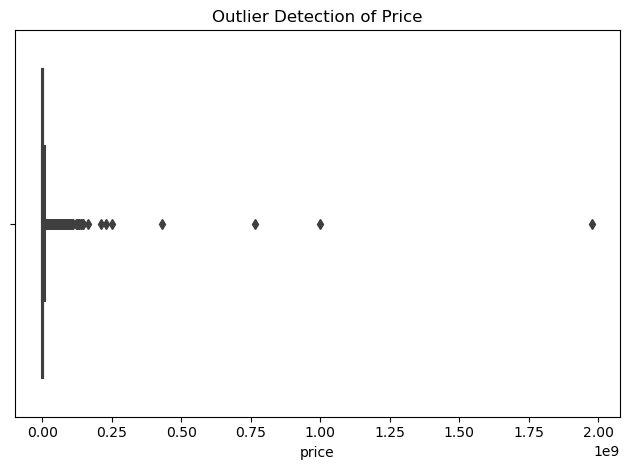

In [73]:
sns.boxplot(x='price', data=stand_df)
plt.title('Outlier Detection of Price')
plt.tight_layout()
plt.show()

In [74]:
#def impute(x):
Q3=stand_df['price'].quantile(0.75)
Q1=stand_df['price'].quantile(0.25)
IQR=Q3-Q1
lb=Q1-1.5*(IQR)
ub=Q3+1.5*(IQR)
idx=np.where(stand_df['price']>ub)
stand_df['price'].iloc[idx]=ub
idx=np.where(stand_df['price']<lb)
stand_df['price'].iloc[idx]=lb

C:\Users\Bhakti\AppData\Local\Temp\ipykernel_20284\1180143570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand_df['price'].iloc[idx]=ub
C:\Users\Bhakti\AppData\Local\Temp\ipykernel_20284\1180143570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand_df['price'].iloc[idx]=lb


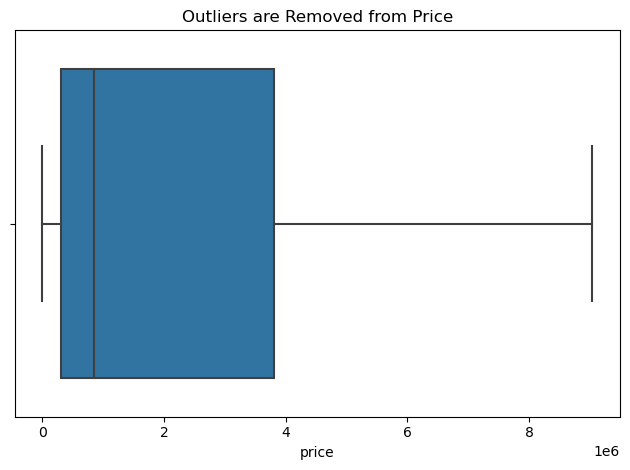

In [75]:
sns.boxplot(x='price', data=stand_df)
plt.title('Outliers are Removed from Price')
plt.tight_layout()
plt.show()

In [76]:
#Applying Standard Scaler to Numerical Columns to standerdise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
stand_df[['price','Year','Mileage']]= scaler.fit_transform(stand_df[['price','Year','Mileage']])

C:\Users\Bhakti\AppData\Local\Temp\ipykernel_20284\564311108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand_df[['price','Year','Mileage']]= scaler.fit_transform(stand_df[['price','Year','Mileage']])


In [77]:
stand_df.shape

(154954, 3)

In [78]:
cat_col.shape

(154954, 4)

In [79]:
#Label Encoding on Categorical Columns
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cat_col['category'] = lb.fit_transform(cat_col[['category']])
cat_col['Condition'] = lb.fit_transform(cat_col[['Condition']])
cat_col['Model'] = lb.fit_transform(cat_col[['Model']])
cat_col['Brand'] = lb.fit_transform(cat_col[['Brand']])

C:\Users\Bhakti\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bhakti\AppData\Local\Temp\ipykernel_20284\4072193194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_col['category'] = lb.fit_transform(cat_col[['category']])
C:\Users\Bhakti\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bhakti\AppData\Local\Temp\ipyke

In [80]:
#Concating the Numeric Columns and Categorical columns for performing PCA
pcadf = pd.concat([cat_col, stand_df], axis=1)

In [81]:
pcadf.head()

,category,Condition,Model,Brand,price,Year,Mileage
31,1,0,655,80,2.334232,0.918993,-0.930940
1349,1,1,191,86,2.334232,0.710540,-0.833011
1701,1,1,134,86,2.334232,0.502087,-0.669796
1702,1,1,117,17,1.442144,0.606314,-0.332484
1917,1,2,167,57,2.334232,-0.019045,0.559760


In [82]:
#PCA 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
pca = PCA(n_components=2)
pcanew = pca.fit_transform(pcadf)

# Create a DataFrame with principal components
pri_df = pd.DataFrame(data=pcanew, columns=['PC1', 'PC2'])
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose number of clusters (you can adjust this)
pri_df['Cluster'] = kmeans.fit_predict(pri_df[['PC1', 'PC2']])

labels = kmeans.labels_
# Calculate various clustering evaluation metrics
print("Silhouette Score:", silhouette_score(pcanew, labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(pcanew, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(pcanew, labels))

C:\Users\Bhakti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5660713373917763
Calinski-Harabasz Index: 719278.2965663386
Davies-Bouldin Index: 0.5844350503024478


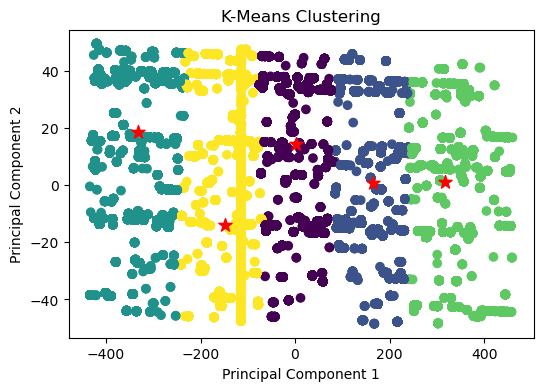

In [83]:
#Plotting Scatter Plot to show the clusters
plt.figure(figsize=(6, 4))
plt.scatter(pcanew[:, 0], pcanew[:, 1], c=labels)
cluster_centers=kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="*", c="red", s=100)
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Section 3: Geographical Analysis of Demand and Supply

In [84]:
# Group the elements in the geo_region by counting their occurrences
newdf.groupby('geo_region').size()

geo_region
LK       20342
LK-11    48085
LK-12    27357
LK-21     9898
LK-22     1825
LK-23      742
LK-31     5550
LK-33     2350
LK-41     3757
LK-42      340
LK-43      230
LK-44      726
LK-51     2022
LK-52     2562
LK-53     1836
LK-61    10838
LK-62     4292
LK-71     4877
LK-72     1579
LK-81     2252
LK-92     3494
dtype: int64

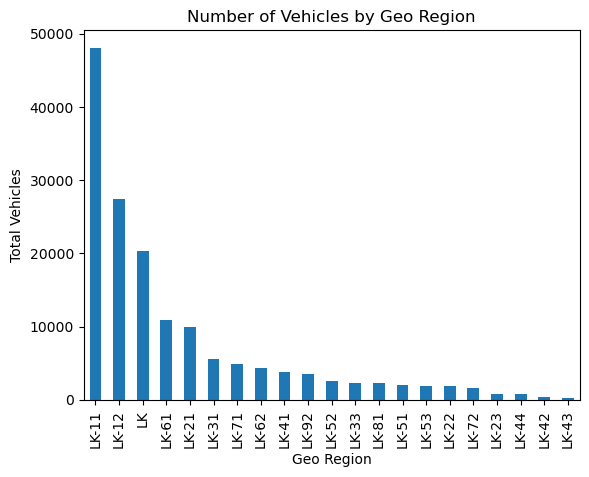

In [85]:
# Create a bar chart of the grouped data
newdf.groupby('geo_region').size().sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Geo Region')
plt.ylabel('Total Vehicles')
plt.title('Number of Vehicles by Geo Region')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [86]:
# prompt: i want sorted location values and take only values having the size more than 1000

sorted_locations = newdf['location'].value_counts().sort_values(ascending=False)
filtered_locations = sorted_locations[sorted_locations > 1000]
print(filtered_locations)


location
Gampaha City         5050
Piliyandala          4504
Kohuwala             4429
Kurunegala City      4284
Kandy City           4009
Negombo              3584
Boralesgamuwa        3270
Jaffna City          3232
Nugegoda             2926
Matara City          2787
Bandaragama          2771
Dehiwala             2767
Katunayake           2754
Galle City           2725
Anuradhapura City    2656
Ja-Ela               2580
Kottawa              2524
Maharagama           2486
Kadawatha            2256
Malabe               2118
Homagama             2095
Batticaloa City      2022
Minuwangoda          1768
Panadura             1767
Moratuwa             1750
Kalutara City        1562
Ratnapura City       1542
Wattala              1416
Kuliyapitiya         1410
Kaduwela             1410
Horana               1272
Katugastota          1262
Nittambuwa           1248
Trincomalee City     1200
Kiribathgoda         1174
Colombo 8            1161
Kegalle City         1156
Gampola              1121
Pan

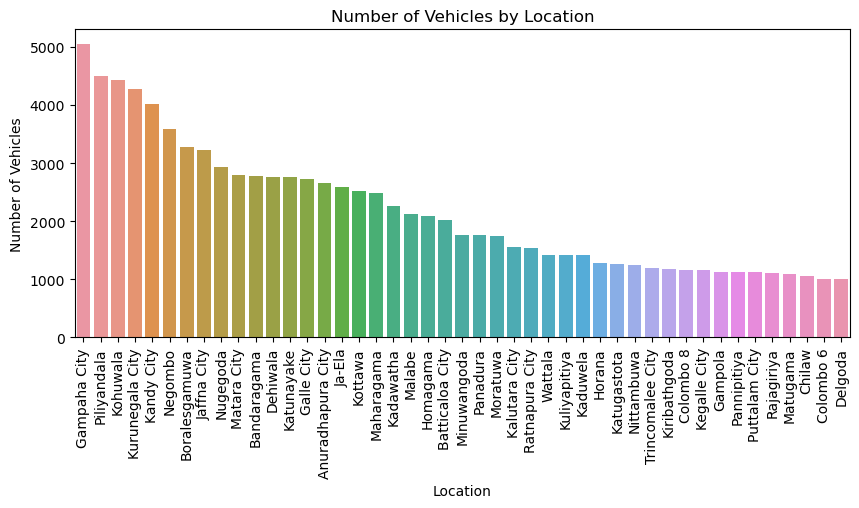

In [87]:
# prompt: now create the matplotlib from the above data having the locations with the size and change the figsize into  more smaller as compared to before
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Change the figsize to be smaller
sns.barplot(x=filtered_locations.index, y=filtered_locations.values)

plt.xlabel('Location')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Location')

plt.xticks(rotation=90)

plt.show()


In [88]:
#Selecting necessary columns from original dataframe
locdf=newdf[['location','geo_region','area_name']].reset_index(drop=True)

In [89]:
#Renaming columns as per my requirement
locdf.rename(columns={'location': 'Loction', 'geo_region': 'Geo_Region','area_name': 'City'}, inplace=True)

In [90]:
locdf.head()

,Loction,Geo_Region,City
0,Nugegoda,LK-11,Colombo
1,Kohuwala,LK-11,Colombo
2,Kohuwala,LK-11,Colombo
3,Kohuwala,LK-11,Colombo
4,Colombo 14,LK-11,Colombo


In [91]:
#Total Number of vehicles belong to each city
locdf.groupby('City').size()

City
Ampara           2562
Anuradhapura     4877
Badulla          2252
Batticaloa       2022
Colombo         48085
Galle            5550
Gampaha         27357
Hambantota       2350
Jaffna           3757
Kalutara         9512
Kandy            9898
Kegalle          3494
Kilinochchi       340
Kurunegala      10838
Mannar            230
Matale           1825
Matara           4994
Monaragala       1611
Mullativu         207
Nuwara Eliya      742
Polonnaruwa      1579
Puttalam         4292
Ratnapura        4018
Trincomalee      1836
Vavuniya          726
dtype: int64

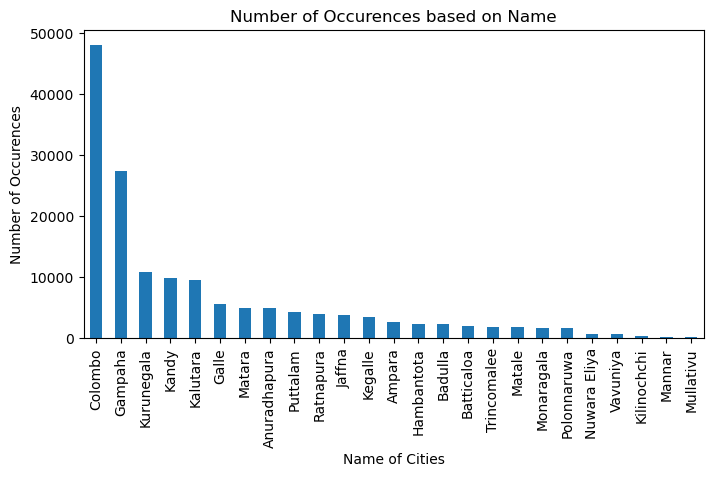

In [92]:
#Plot a bar plot To show the city vise total number of occurences
plt.figure(figsize=(8, 4))
locdf.groupby('City').size().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Name of Cities')
plt.ylabel('Number of Occurences')
plt.title('Number of Occurences based on Name')
plt.xticks(rotation=90)
plt.show()

In [93]:
df.dtypes

ad_title                object
ad_description          object
details                 object
slug                    object
type                    object
price                   object
timestamp               object
posted_date             object
deactivation_date       object
category                object
parent_category         object
location                object
geo_region              object
is_delivery_free          bool
is_doorstep_delivery      bool
is_dsd_applicable         bool
is_member               object
is_authorized_dealer    object
is_featured_member      object
is_verified               bool
membership_level        object
member_since            object
user                    object
Year                    object
area_name               object
dtype: object

In [94]:
df.posted_date.head()

0    2023-02-23T23:35:10+05:30
1    2023-02-23T08:32:44+05:30
2    2022-12-01T20:27:49+05:30
3    2022-12-04T14:47:27+05:30
4    2022-12-08T09:28:04+05:30
Name: posted_date, dtype: object

In [95]:
# Convert 'posted_date' to datetime format
locdf['datetime'] = pd.to_datetime(df['posted_date'])
# Extract the date component
locdf['Date'] = locdf['datetime'].dt.date
locdf['Date'] = pd.to_datetime(locdf['Date'])
locdf['Month_Year'] = locdf['Date'].dt.strftime('%Y-%m')
locdf.drop('datetime',axis=1, inplace=True)

In [96]:
locdf.Date.head()

0   2023-02-23
1   2023-02-23
2   2022-12-01
3   2022-12-04
4   2022-12-08
Name: Date, dtype: datetime64[ns]

In [97]:
locdf.dtypes

Loction               object
Geo_Region            object
City                  object
Date          datetime64[ns]
Month_Year            object
dtype: object

In [98]:
grp_data =locdf.groupby('Month_Year').size()
data = grp_data.reset_index(name='Count')

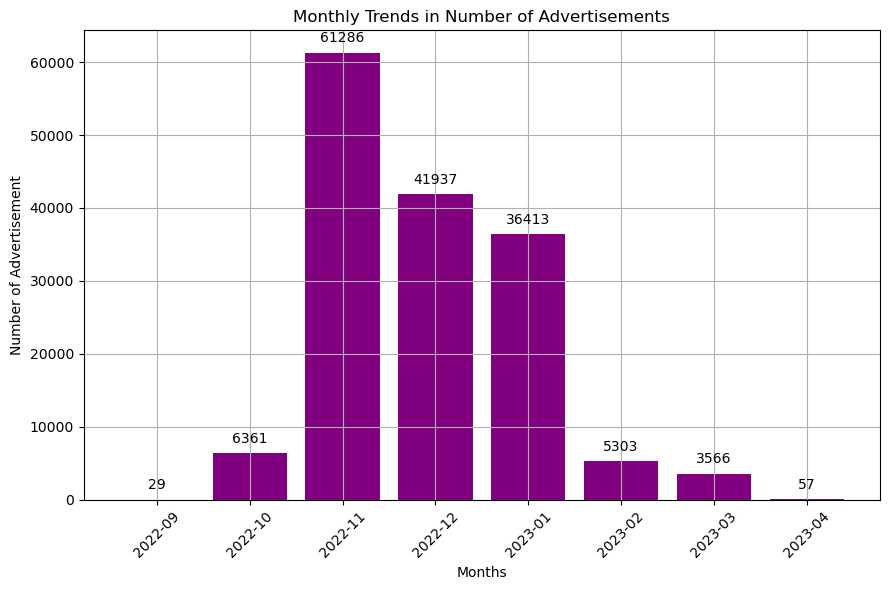

In [99]:
# Plotting as a bar plot
plt.figure(figsize=(9, 6))
bars = plt.bar(data['Month_Year'], data['Count'], color='purple')

# Adding annotations (count values) on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Monthly Trends in Number of Advertisements')
plt.xlabel('Months')
plt.ylabel('Number of Advertisement')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()